# 对原有数据集分析

In [2]:
import pandas as pd

# 读取Excel文件
file_path = 'original_data/data.s1.xlsx'  # 替换为你的Excel文件路径
df = pd.read_excel(file_path, index_col=0, header=0)

In [3]:
# 提取第10列到倒数第四列的数据
composition_data = df.iloc[:, 9:-3]

y_data = df.iloc[:, -1]

# 打印成分数据的列标签
column_labels = composition_data.columns
print(column_labels)

Index(['C (mass%)', 'Si (mass%)', 'Mn (mass%)', 'P (mass%)', 'S (mass%)',
       'Ni (mass%)', 'Cr (mass%)', 'Mo (mass%)', 'Cu (mass%)', 'W (mass%)',
       'Co (mass%)', 'Al (mass%)', 'N (mass%)', 'Nb+Ta (mass%)', 'B (mass%)',
       'V (mass%)', 'Ti (mass%)', 'Fe (mass%)', 'Zr (mass%)', 'Re (mass%)',
       'Y (mass%)', 'Hf (mass%)'],
      dtype='object')


# 划分成分数据

In [4]:
# 划分成分数据
fe_data = composition_data.iloc[:72, :]

y_fe = y_data.iloc[:72]

# 打印前两行和最后两行
print("前两行:")
print(y_fe.head(2))

print("\n最后两行:")
print(y_fe.tail(2))

前两行:
Class
1    125.2
2    267.6
Name: Creep rupture life (h), dtype: float64

最后两行:
Class
71    2170.1
72    7558.0
Name: Creep rupture life (h), dtype: float64


In [5]:
oth_data = composition_data.iloc[72:173, :]

y_oth = y_data.iloc[72:173]

# 打印前两行和最后两行
print("前两行:")
print(y_oth.head(2))

print("\n最后两行:")
print(y_oth.tail(2))

前两行:
Class
73     90.6
74    699.3
Name: Creep rupture life (h), dtype: float64

最后两行:
Class
172     184.1
173    2748.6
Name: Creep rupture life (h), dtype: float64


In [6]:
co_data = composition_data.iloc[173:211, :]

y_co = y_data.iloc[173:211]

# 打印前两行和最后两行
print("前两行:")
print(y_co.head(2))

print("\n最后两行:")
print(y_co.tail(2))

前两行:
Class
174    202.1
175    382.5
Name: Creep rupture life (h), dtype: float64

最后两行:
Class
210     732.9
211    6451.9
Name: Creep rupture life (h), dtype: float64


In [7]:
ni_data = composition_data.iloc[211:753, :]

y_ni = y_data.iloc[211:753]

# 打印前两行和最后两行
print("前两行:")
print(y_ni.head(2))

print("\n最后两行:")
print(y_ni.tail(2))

前两行:
Class
212     8.7
213    89.0
Name: Creep rupture life (h), dtype: float64

最后两行:
Class
752    199.2
753    129.2
Name: Creep rupture life (h), dtype: float64


# 分析合金成分

In [8]:
fe_data = composition_data.iloc[:72, :]
oth_data = composition_data.iloc[72:173, :]
co_data = composition_data.iloc[173:211, :]
ni_data = composition_data.iloc[211:753, :]

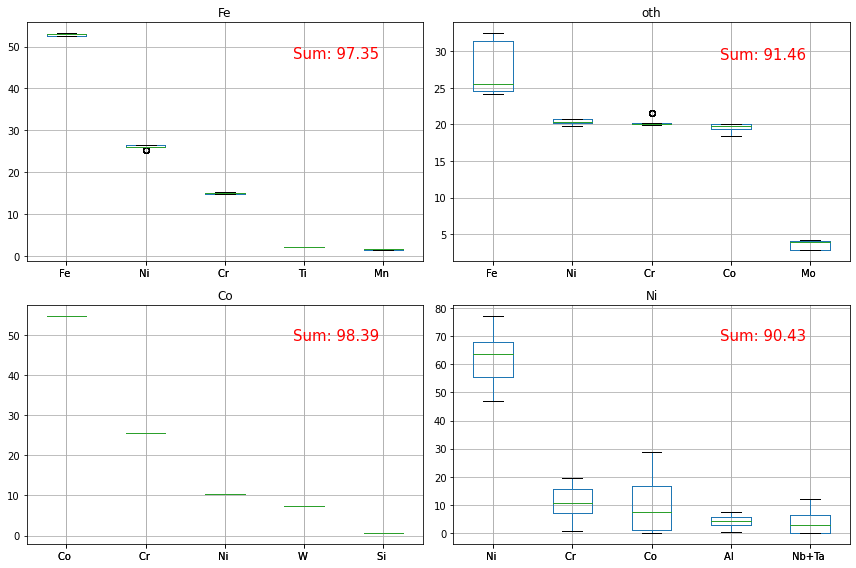

In [10]:
import matplotlib.pyplot as plt

# 创建一个2x2的子图布局
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 对每个数据集进行相同操作并画箱线图
for ax, data, title in zip(axes.flatten(), [fe_data, oth_data, co_data, ni_data],
                            ['Fe', 'oth', 'Co', 'Ni']):
    # 计算每一列的平均值
    column_means = data.mean()

    # 找到平均值最大的三列
    top_three_columns = column_means.nlargest(5)

    # 选择占比最大的三列的数据
    top_three_data = data[top_three_columns.index]

    # 在子图中绘制箱线图
    ax.boxplot(top_three_data.values)
    # 在子图中绘制箱线图，设置横坐标为列标签
    top_three_data.boxplot(ax=ax, labels=top_three_data.columns)
    # 去除 x 轴标签中的 "(mass%)"
    ax.set_xticklabels([label.get_text().replace('(mass%)', '') for label in ax.get_xticklabels()])

    
     # 计算并标注均值之和
    sum_of_means = top_three_data.mean().sum()
        # 获取子图的坐标范围
    x_min, x_max, y_min, y_max = ax.axis()
    # 在右上角标注均值之和
    ax.text(x_max*0.9,y_max*0.9, f'Sum: {sum_of_means:.2f}', ha='right', va='top', color='red', fontsize=15)

    ax.set_title(title)

# 调整子图布局
plt.tight_layout()

# 显示图形
plt.show()

# 对目标数据集进行分析

In [4]:
import pandas as pd
import os

In [6]:

folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\original_data' 

file_path = os.path.join(folder_path, 'data.s2.xlsx')


df_t = pd.read_excel(file_path, index_col=0, header=0)



In [14]:
df_summary = df_t.describe().loc[[ 'min', 'max','mean', 'std',]]
# 将结果转置，使统计信息横向排列
df_summary_transposed = df_summary.transpose()

# 将结果转置，使统计信息横向排列
df_summary_transposed = df_summary.transpose()

# 保留两位有效数字
df_summary_transposed_rounded = df_summary_transposed.round(2)

# 显示结果
print(df_summary_transposed_rounded)
print(df_summary_transposed_rounded.shape)
# 保存为 Excel 文件
df_summary_transposed_rounded.to_excel('summary_statistics.xlsx')

                                        min      max    mean     std
Solution treatment time (h)            0.00     2.00    0.80    0.93
Solution treatment temperature (℃)     0.00  1080.00  685.48  484.04
Solution cooling way                   0.00     3.00    0.74    0.63
Aging treatment time (h)               0.00    50.00    2.77    8.44
Aging treatment temperature (℃)        0.00   770.00  467.01  330.43
Aging cooling way                      0.00     1.00    0.67    0.47
2nd aging treatment time (h)           0.00    50.00    1.14    7.49
2nd aging treatment temperature (℃)    0.00   610.00   13.86   91.43
2nd aging cooling way                  0.00     1.00    0.02    0.15
C (mass%)                              0.00     0.10    0.06    0.03
Si (mass%)                             0.00     0.46    0.24    0.17
Ni (mass%)                             0.00     0.70    0.15    0.29
Mo (mass%)                             0.00     0.80    0.36    0.25
W (mass%)                         

In [ ]:
# 分析成分数据
composition_data = df_t.iloc[:, 9:-3]

y_data = df_t.iloc[:, -1]

# 打印成分数据的列标签
column_labels = composition_data.columns
print(column_labels)

In [4]:
ti_data = composition_data.iloc[:, :]
y_ti = y_data.iloc[:]

# 打印前两行和最后两行
print("前两行:")
print(y_ti.head(2))

print("\n最后两行:")
print(y_ti.tail(2))

前两行:
Class
1    17.0
2    52.0
Name: Creep rupture life (h), dtype: float64

最后两行:
Class
87    38.0
88    19.0
Name: Creep rupture life (h), dtype: float64


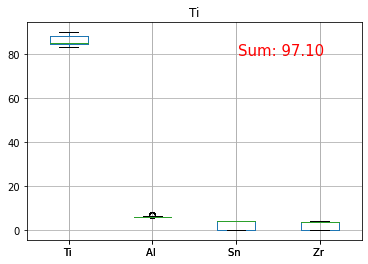

In [8]:
import matplotlib.pyplot as plt
# 创建一个1x1的子图布局
fig, ax = plt.subplots(figsize=(6, 4))

column_means = ti_data.mean()
top_three_columns = column_means.nlargest(4)

# 选择占比最大的三列的数据
top_three_data = ti_data[top_three_columns.index]

# 在子图中绘制箱线图
ax.boxplot(top_three_data.values)
# 在子图中绘制箱线图，设置横坐标为列标签
top_three_data.boxplot(ax=ax, labels=top_three_data.columns)
# 去除 x 轴标签中的 "(mass%)"
ax.set_xticklabels([label.get_text().replace('(mass%)', '') for label in ax.get_xticklabels()])


 # 计算并标注均值之和
sum_of_means = top_three_data.mean().sum()
    # 获取子图的坐标范围
x_min, x_max, y_min, y_max = ax.axis()
# 在右上角标注均值之和
ax.text(x_max*0.9,y_max*0.9, f'Sum: {sum_of_means:.2f}', ha='right', va='top', color='red', fontsize=15)

ax.set_title('Ti')

# 显示图形
plt.show()

# 对处理后的源数据集进行划分

In [10]:
import pandas as pd
import os
# 读取Excel文件
# file_path = 'data/data.S1_mat_pca.xlsx'  # 替换为你的Excel文件路径
folder_path = r'C:\Users\13282\Desktop\papercode\data\Alloy\original_data' 
file_path = os.path.join(folder_path, 'data.s1.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
df = pd.read_excel(file_path)

file_path_2 = os.path.join(folder_path, 'data.s2.xlsx')  # y 记得加负号 ，如果需要原始值，需要反log回去
ti_data = pd.read_excel(file_path_2)

In [11]:
fe_data = df.iloc[:72, :]
oth_data = df.iloc[72:173, :]
co_data = df.iloc[173:211, :]
ni_data = df.iloc[211:753, :]

In [12]:
print(fe_data.shape)
print(ti_data.shape)

(72, 35)
(88, 27)


In [30]:
df_summary = ni_data.iloc[:, -3:].describe().loc[[ 'min', 'max','mean', 'std',]]
# 将结果转置，使统计信息横向排列
df_summary_transposed = df_summary.transpose()

# 将结果转置，使统计信息横向排列
df_summary_transposed = df_summary.transpose()

# 保留两位有效数字
df_summary_transposed_rounded = df_summary_transposed.round(2)

# 显示结果
print(df_summary_transposed_rounded)
print(df_summary_transposed_rounded.shape)

                          min       max     mean      std
Test temperature (℃)    204.0    1800.0   903.98   202.26
Test stress (MPa)        10.0     800.0   261.88   181.46
Creep rupture life (h)    1.4  117099.0  3011.87  8886.07
(3, 4)


In [46]:
y_ni =  ni_data.iloc[:, -3].values 
y_ti =  ti_data.iloc[:, -3].values 

# y_ni_log = np.log(y_ni)
# y_ti_log = np.log(y_ti)

# x1 = y_ni_log
# x2 = y_ti_log
x1 = y_ni
x2 = y_ti

In [51]:
color_sets = ['blue', 'green']
color_1 = (147/255, 85/255, 150/255)
color_2 = (116/255, 160/255, 161/255)

# label_x = ' log(Creep Rupture Life) [h]'
# label_x = ' Test stress [MPa]'
label_x = ' Test temperature [℃]'

label_y = 'Counts [-]'

binwidth = 150
axis = binwidth*2

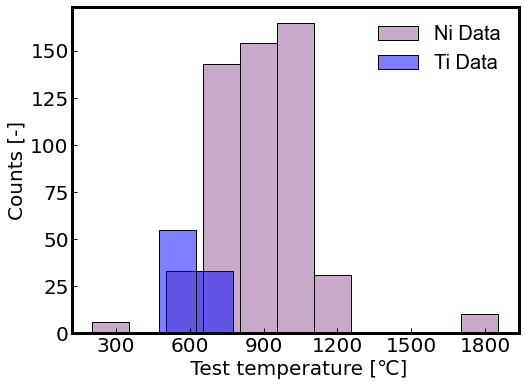

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



fontsize = 20

plt.figure(figsize=(8, 6))

# 使用Seaborn的histplot绘制直方图
sns.histplot(x1, binwidth=binwidth, alpha=0.5, color=color_1, label='Ni Data')
sns.histplot(x2, binwidth=binwidth, alpha=0.5, color='blue', label='Ti Data')

plt.gca().xaxis.set_major_locator(plt.MultipleLocator(axis))


plt.tick_params(direction='in', length=5, width=1, labelsize=fontsize, grid_alpha=0.7)

plt.xlabel(label_x, fontsize=fontsize)
plt.ylabel(label_y, fontsize=fontsize)
# plt.title('Distribution of Ni and Ti Data')
legend = plt.legend(loc='best', fontsize=fontsize,frameon=False)
plt.setp(legend.get_texts(), fontname='Arial')
for spine in plt.gca().spines.values():
    spine.set_linewidth(3)  # Set frame width to 3

plt.show()

In [45]:
fe_data.to_excel('Fe.xlsx', index=False)
oth_data.to_excel('others.xlsx', index=False)
co_data.to_excel('Co.xlsx', index=False)
ni_data.to_excel('Ni.xlsx', index=False)
